In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import pathlib

In [6]:
t_max = 30
t = np.linspace(0, t_max, num=3000)
dt = t[1] - t[0]

In [3]:
# read results
x = []
m = 10000
folder = "results"
for i in range(m):
    p = os.path.join(os.getcwd(), folder, "x_" + str(i) + ".txt")
    p = pathlib.Path(p)
    if not p.exists():
        continue
    with p.open() as f:
        data = np.loadtxt(f)    
        x.append(data[:, 1])

In [4]:
# read results
x_ = []
m = 10000
folder = "results_2"
for i in range(m):
    p = os.path.join(os.getcwd(), folder, "x_" + str(i) + ".txt")
    p = pathlib.Path(p)
    if not p.exists():
        continue
    with p.open() as f:
        data = np.loadtxt(f)    
        x_.append(data[:, 1])

In [5]:
def compute_x2(x, ti_skip):
    # Compute dispersion along trajectory
    n_t_ = len(x[0])

    x2 = np.zeros(n_t_ - ti_skip)

    for x_trajectory in x:
        for i in range(ti_skip, n_t_):
            x2[i - ti_skip] += (x_trajectory[i] - x_trajectory[ti_skip])**2

    x2 = x2 / len(x)    
    
    return x2

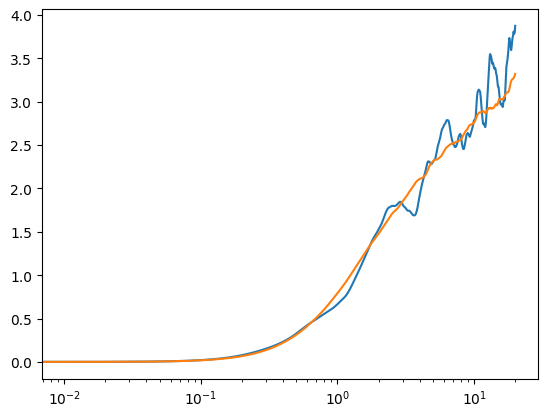

In [8]:
x2_ = compute_x2(x_, 1000)
plt.plot(t[:len(x2_)], x2_)
x2 = compute_x2(x, 1000)
plt.plot(t[:len(x2)], x2)
plt.xscale('log')